In [ ]:
# import package
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

### Formulasi Masalah
Diberikannya data pelanggan yang kemudian dikelompokkan berdasar data pelanggan di dealer. <br>
Data pelanggan: \
SIM: 0 tidak punya, 1 punya \
Kode_Daerah: kode area tempat tinggal pelanggan \
Sudah_Asuransi: 0 belum punya asuransi, 1 udah punya asuransi \
Umur_kendaraan: umur kendaraan \
Kendaraan_Rusak: 0 belum pernah rusak, 1 sudah pernah rusak \
Premi: jumlah premi yang harus dibayarkan per tahun \
Kanal_Penjualan: kode kanal untuk menghubungi pelanggan (email, telpon, dll) \
Lama_Berlangganan: sudah berapa lama pelanggan menjadi klien perusahaan \
tertarik: 0 tidak, 1 tertarik


# Data Set

In [ ]:
# read dataset train
df_train = pd.read_csv('kendaraan_train.csv')

In [ ]:
# read dataset test
df_test = pd.read_csv('kendaraan_test.csv')

# Eksplorasi dan Persiapan Data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Change into numerical

In [ ]:
#Jenis_Kelamin
replace_values = {'Wanita' : 0, 'Pria' : 1} 
df_train = df_train.replace({"Jenis_Kelamin": replace_values})

#umur kendaraan
replace_values = {'< 1 Tahun' : 0, '1-2 Tahun' : 1, '> 2 Tahun' : 2 }   
df_train = df_train.replace({"Umur_Kendaraan": replace_values})

#Kendaraan_Rusak
replace_values = {'Pernah' : 1, 'Tidak' : 0} 
df_train = df_train.replace({"Kendaraan_Rusak": replace_values}) 
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,285828,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,285829,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,285830,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [ ]:
#Jenis_Kelamin
replace_values = {'Wanita' : 0, 'Pria' : 1} 
df_test = df_test.replace({"Jenis_Kelamin": replace_values})

#umur kendaraan
replace_values = {'< 1 Tahun' : 0, '1-2 Tahun' : 1, '> 2 Tahun' : 2 }   
df_test = df_test.replace({"Umur_Kendaraan": replace_values})

#Kendaraan_Rusak
replace_values = {'Pernah' : 1, 'Tidak' : 0} 
df_test = df_test.replace({"Kendaraan_Rusak": replace_values}) 
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,2,1,31039,124,67,0
47635,1,41,1,15,0,1,1,2630,157,232,0
47636,1,24,1,29,1,0,0,33101,152,211,0
47637,1,59,1,30,0,1,1,37788,26,239,1


#### Check missing values and duplicated data

In [ ]:
# check NaN df_train
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# check NaN df_test
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# mencari nilai skewness untuk menentukan apakah missing value akan di assign oleh median atau mean

df_train.skew(axis=0, skipna=True)

id                    0.000000
Jenis_Kelamin        -0.162403
Umur                  0.671077
SIM                 -21.489056
Kode_Daerah          -0.116322
Sudah_Asuransi        0.165452
Umur_Kendaraan        0.252693
Kendaraan_Rusak      -0.019166
Premi                 1.656493
Kanal_Penjualan      -0.899909
Lama_Berlangganan     0.003858
Tertarik              2.303219
dtype: float64

In [ ]:
#Tidak mempertimbangkan skewness (value column ini menggunakan mode(karena pilihan value terbatas))

MODE_Jenis_Kelamin = df_train['Jenis_Kelamin'].mode()[0]
df_train['Jenis_Kelamin'].replace(np.nan, MODE_Jenis_Kelamin, inplace=True)

MODE_SIM = df_train['SIM'].mode()[0]
df_train['SIM'].replace(np.nan, MODE_SIM, inplace=True)

MODE_SA = df_train['Sudah_Asuransi'].mode()[0]
df_train['Sudah_Asuransi'].replace(np.nan, MODE_SA, inplace=True)

MODE_UK = df_train['Umur_Kendaraan'].mode()[0]
df_train['Umur_Kendaraan'].replace(np.nan, MODE_UK, inplace=True)

MODE_KR = df_train['Kendaraan_Rusak'].mode()[0]
df_train['Kendaraan_Rusak'].replace(np.nan, MODE_KR, inplace=True)

MODE_TT = df_train['Tertarik'].mode()[0]
df_train['Tertarik'].replace(np.nan, MODE_TT, inplace=True)

#mean (diantara -1 sampai 1)
df_train['Umur'].fillna(df_train['Umur'].mean(),inplace=True)
df_train['Kode_Daerah'].fillna(df_train['Kode_Daerah'].mean(),inplace=True)
df_train['Kanal_Penjualan'].fillna(df_train['Kanal_Penjualan'].mean(),inplace=True)
df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mean(),inplace=True)

#median
df_train['Premi'].fillna(df_train['Premi'].median(),inplace=True)

In [ ]:
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# check duplicated value
df_train[df_train['id'].duplicated(keep=False)].sort_values('id')

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik


#### Handling Outlier

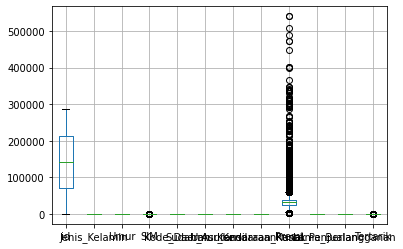

In [ ]:
pd.DataFrame.boxplot(df_train)

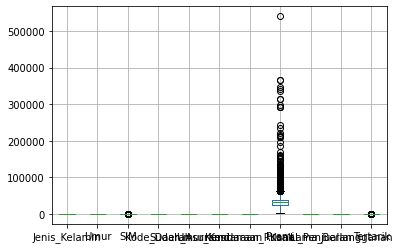

In [ ]:
pd.DataFrame.boxplot(df_test)

dari hasil boxplot, column premi memiliki outliner yang banyak

more_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool  | less_than:  0         False
1         False
2         False
3          True
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: Premi, Length: 285831, dtype: bool
more_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: SIM, Length: 285831, dtype: bool  | less_than:  0         False
1         False
2         False
3         False
4         False
          ...  
285826    False
285827    False
285828    False
285829    False
285830    False
Name: SIM, Length: 285831, dtype: bool


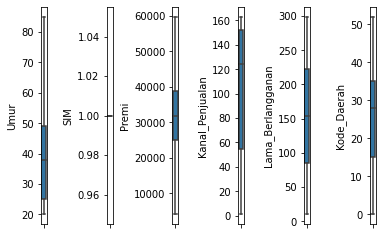

In [ ]:
# handling outlier data train

# menghitung jarak interquartile
def interquartile(df_train,x):
  q1 = (df_train[x]).quantile(0.25)
  q3 = (df_train[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

  # menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(df_train,x,maximum,minimum):
  more_than = (df_train[x] > maximum)
  less_than = (df_train[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  df_train[x] = df_train[x].mask(more_than, maximum,axis=0)
  df_train[x] = df_train[x].mask(less_than, minimum,axis=0)
  return df_train

maximum,minimum = interquartile(df_train,'Premi')
df_train = sub_outliners(df_train,'Premi',maximum,minimum)

maximum,minimum = interquartile(df_train,'SIM')
df_train = sub_outliners(df_train,'SIM',maximum,minimum)

f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_train["Umur"], ax=a[0])
sns.boxplot(y=df_train["SIM"], ax=a[1])
sns.boxplot(y=df_train["Premi"], ax=a[2])
sns.boxplot(y=df_train["Kanal_Penjualan"], ax=a[3])
sns.boxplot(y=df_train["Lama_Berlangganan"], ax=a[4])
sns.boxplot(y=df_train["Kode_Daerah"], ax=a[5])
plt.subplots_adjust(wspace=10)

more_than:  0        False
1        False
2         True
3        False
4        False
         ...  
47634    False
47635    False
47636    False
47637    False
47638    False
Name: Premi, Length: 47639, dtype: bool  | less_than:  0        False
1        False
2        False
3        False
4        False
         ...  
47634    False
47635    False
47636    False
47637    False
47638    False
Name: Premi, Length: 47639, dtype: bool
more_than:  0        False
1        False
2        False
3        False
4        False
         ...  
47634    False
47635    False
47636    False
47637    False
47638    False
Name: SIM, Length: 47639, dtype: bool  | less_than:  0        False
1        False
2        False
3        False
4        False
         ...  
47634    False
47635    False
47636    False
47637    False
47638    False
Name: SIM, Length: 47639, dtype: bool


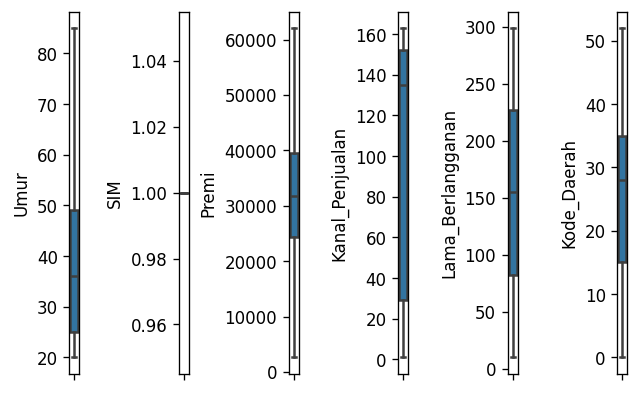

In [ ]:
# handling outlier data test

# menghitung jarak interquartile
def interquartile(df_test,x):
  q1 = (df_test[x]).quantile(0.25)
  q3 = (df_test[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

  # menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(df_test,x,maximum,minimum):
  more_than = (df_test[x] > maximum)
  less_than = (df_test[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  df_test[x] = df_test[x].mask(more_than, maximum,axis=0)
  df_test[x] = df_test[x].mask(less_than, minimum,axis=0)
  return df_test

maximum,minimum = interquartile(df_test,'Premi')
df_test = sub_outliners(df_test,'Premi',maximum,minimum)

maximum,minimum = interquartile(df_test,'SIM')
df_test = sub_outliners(df_test,'SIM',maximum,minimum)

f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_test["Umur"], ax=a[0])
sns.boxplot(y=df_test["SIM"], ax=a[1])
sns.boxplot(y=df_test["Premi"], ax=a[2])
sns.boxplot(y=df_test["Kanal_Penjualan"], ax=a[3])
sns.boxplot(y=df_test["Lama_Berlangganan"], ax=a[4])
sns.boxplot(y=df_test["Kode_Daerah"], ax=a[5])
plt.subplots_adjust(wspace=10)

#### Distribusi dan Korelasi

In [ ]:
# distribusi ketertarikan
fig = px.bar(df_train.groupby('Tertarik').size().reset_index(name='count'), 
             x='Tertarik', y='count', width=480, height=480, 
             barmode='group', title='Distribusi Ketertarikan')
fig.show(renderer='colab')

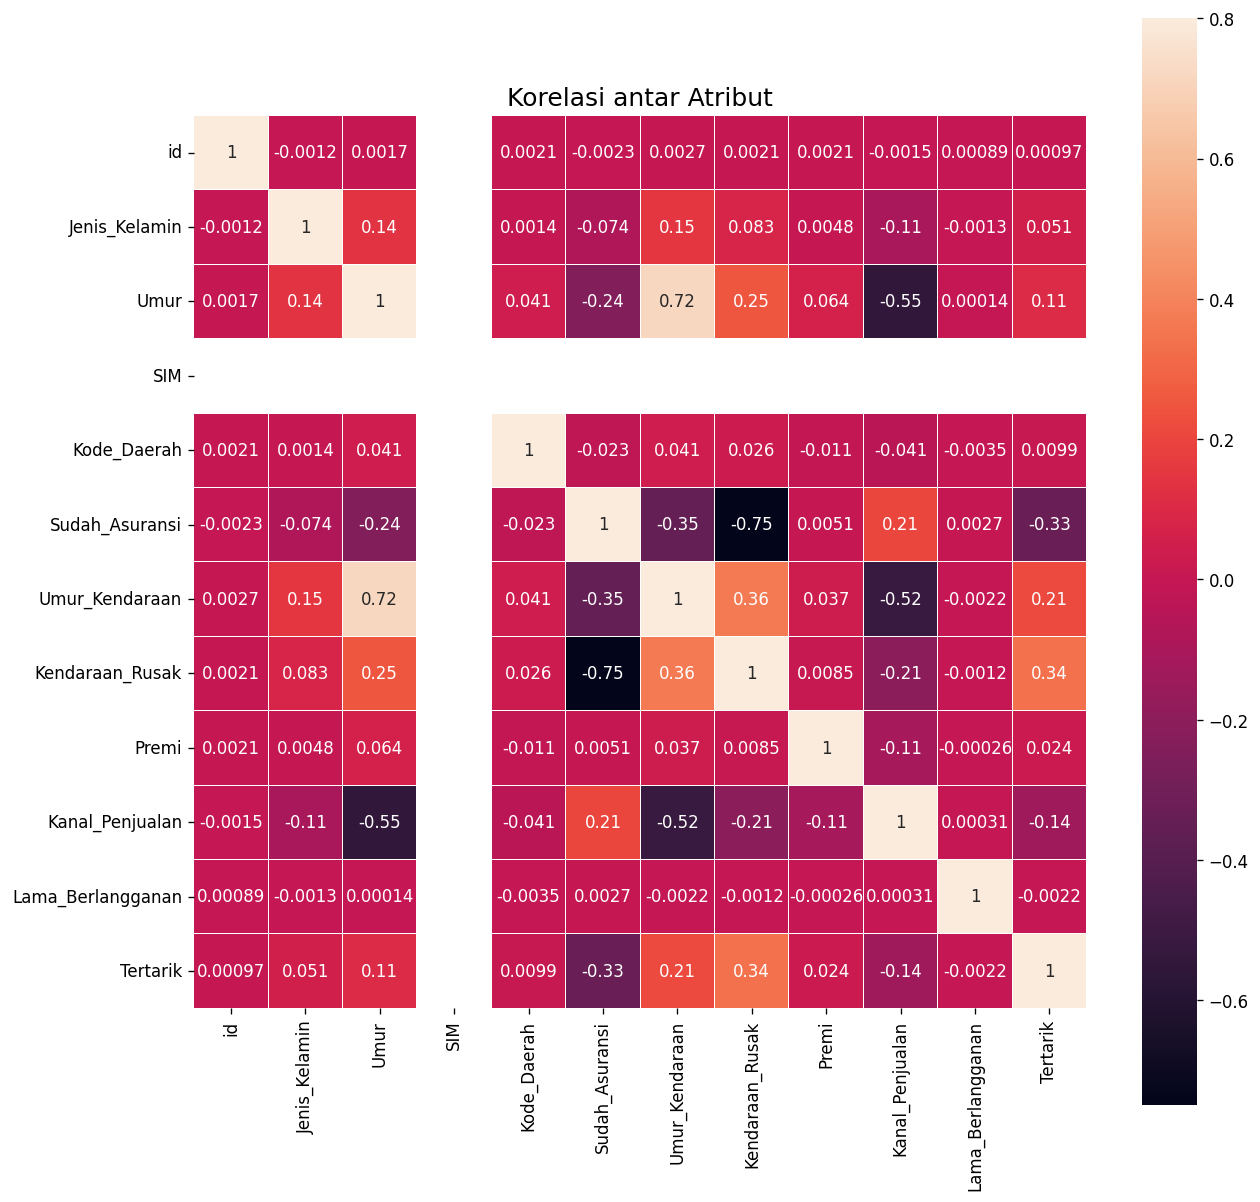

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(12, 12))
sns.color_palette(as_cmap=True)
sns.heatmap(df_train.corr(), vmax=0.8, linewidths=0.01, square=True, annot=True)
plt.title('Korelasi antar Atribut', y=1, size=15)
plt.show()

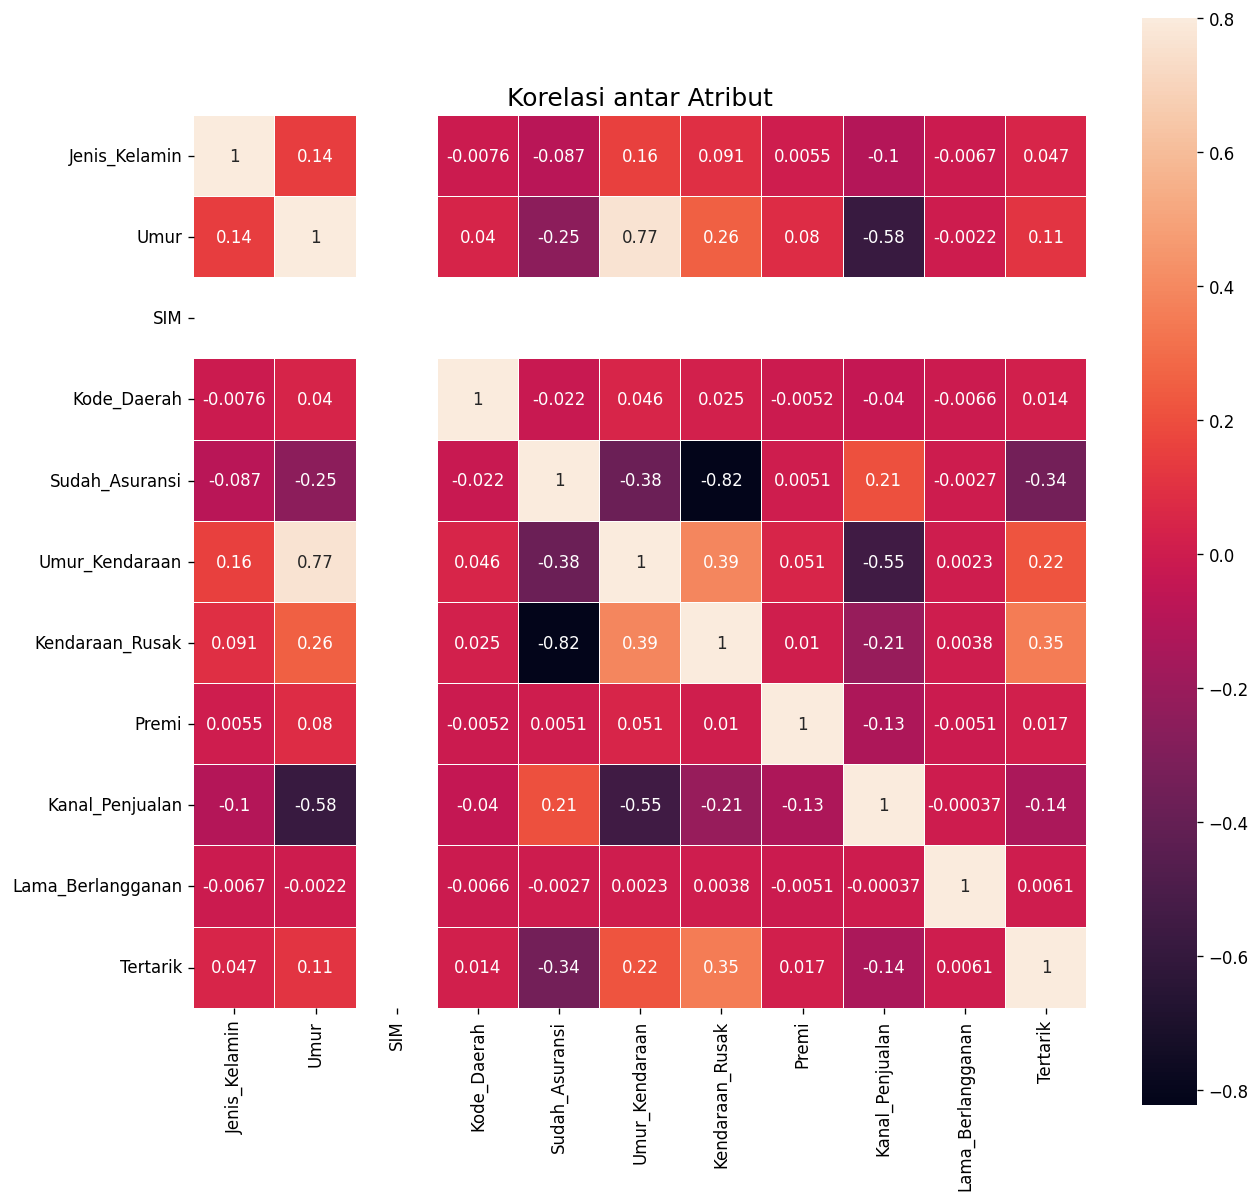

In [ ]:
corr = df_test.corr()
plt.figure(figsize=(12, 12))
sns.color_palette(as_cmap=True)
sns.heatmap(df_test.corr(), vmax=0.8, linewidths=0.01, square=True, annot=True)
plt.title('Korelasi antar Atribut', y=1, size=15)
plt.show()

korelasi paling besar dengan tertarik: kendaraan rusak, umur kendaraan, umur, jenis kelamin, premi.<br>

korelasi antar dataset yang paling besar: umur kendaraan & umur, umur kendaraan & kendaraan rusak, kendaraan rusak & tertarik, sudah asuransi & kanal penjualan, umur kendaraan & tertarik, jenis kelamin & umur kendaraan, umur & tertarik

#### Drop unnecessary column

drop column pada id, karena column id tidak terlalu penting (sudah ada index). Selain itu, column yang memiliki korelasi kecil juga akan di drop

In [ ]:
df_train = df_train.drop(['id'], axis=1)
df_train = df_train.drop(['SIM'], axis=1)
df_train = df_train.drop(['Kode_Daerah'], axis=1)
df_train = df_train.drop(['Lama_Berlangganan'], axis=1)

In [ ]:
df_test = df_test.drop(['SIM'], axis=1)
df_test = df_test.drop(['Kode_Daerah'], axis=1)
df_test = df_test.drop(['Lama_Berlangganan'], axis=1)

In [ ]:
df_train

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik
0,0.0,30.0,1.0,0.0,0.0,28029.0,152.0,0
1,1.0,48.0,0.0,2.0,1.0,25800.0,29.0,0
2,1.0,21.0,1.0,0.0,0.0,32733.0,160.0,0
3,0.0,58.0,0.0,1.0,0.0,4055.0,124.0,0
4,1.0,50.0,0.0,2.0,1.0,34857.0,88.0,0
...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,0.0,0.0,25988.0,152.0,0
285827,0.0,21.0,1.0,0.0,0.0,44686.0,152.0,0
285828,0.0,23.0,1.0,0.0,0.0,49751.0,152.0,0
285829,1.0,68.0,1.0,1.0,0.0,30503.0,124.0,0


In [ ]:
df_test

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik
0,0,49,0,1,1,46963,26,0
1,1,22,1,0,0,39624,152,0
2,1,24,1,0,0,62093,152,0
3,1,46,1,1,0,36266,124,0
4,1,35,0,1,1,26963,152,0
...,...,...,...,...,...,...,...,...
47634,1,61,0,2,1,31039,124,0
47635,1,41,0,1,1,2630,157,0
47636,1,24,1,0,0,33101,152,0
47637,1,59,0,1,1,37788,26,1


#### Scalling

In [ ]:
scalling = MinMaxScaler().fit(df_train[['Jenis_Kelamin','Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Tertarik']])
df_train[['Jenis_Kelamin','Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Tertarik']]=scalling.transform(df_train[['Jenis_Kelamin','Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Tertarik']])
df_train

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik
0,0.0,0.153846,1.0,0.0,0.0,0.430691,0.932099,0.0
1,1.0,0.430769,0.0,1.0,1.0,0.390647,0.172840,0.0
2,1.0,0.015385,1.0,0.0,0.0,0.515198,0.981481,0.0
3,0.0,0.584615,0.0,0.5,0.0,0.000000,0.759259,0.0
4,1.0,0.461538,0.0,1.0,1.0,0.553356,0.537037,0.0
...,...,...,...,...,...,...,...,...
285826,0.0,0.046154,1.0,0.0,0.0,0.394025,0.932099,0.0
285827,0.0,0.015385,1.0,0.0,0.0,0.729933,0.932099,0.0
285828,0.0,0.046154,1.0,0.0,0.0,0.820926,0.932099,0.0
285829,1.0,0.738462,1.0,0.5,0.0,0.475137,0.759259,0.0


In [ ]:
scalling_ = MinMaxScaler().fit(df_test[['Jenis_Kelamin','Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Tertarik']])
df_test[['Jenis_Kelamin','Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Tertarik']]=scalling.transform(df_test[['Jenis_Kelamin','Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Tertarik']])
df_test

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik
0,0.0,0.446154,0.0,0.5,1.0,0.770839,0.154321,0.0
1,1.0,0.030769,1.0,0.0,0.0,0.638995,0.932099,0.0
2,1.0,0.061538,1.0,0.0,0.0,1.042649,0.932099,0.0
3,1.0,0.400000,1.0,0.5,0.0,0.578668,0.759259,0.0
4,1.0,0.230769,0.0,0.5,1.0,0.411541,0.932099,0.0
...,...,...,...,...,...,...,...,...
47634,1.0,0.630769,0.0,1.0,1.0,0.484766,0.759259,0.0
47635,1.0,0.323077,0.0,0.5,1.0,-0.025600,0.962963,0.0
47636,1.0,0.061538,1.0,0.0,0.0,0.521809,0.932099,0.0
47637,1.0,0.600000,0.0,0.5,1.0,0.606011,0.154321,1.0


In [ ]:
df_train

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik
0,0.0,0.153846,1.0,0.0,0.0,0.430691,0.932099,0.0
1,1.0,0.430769,0.0,1.0,1.0,0.390647,0.172840,0.0
2,1.0,0.015385,1.0,0.0,0.0,0.515198,0.981481,0.0
3,0.0,0.584615,0.0,0.5,0.0,0.000000,0.759259,0.0
4,1.0,0.461538,0.0,1.0,1.0,0.553356,0.537037,0.0
...,...,...,...,...,...,...,...,...
285826,0.0,0.046154,1.0,0.0,0.0,0.394025,0.932099,0.0
285827,0.0,0.015385,1.0,0.0,0.0,0.729933,0.932099,0.0
285828,0.0,0.046154,1.0,0.0,0.0,0.820926,0.932099,0.0
285829,1.0,0.738462,1.0,0.5,0.0,0.475137,0.759259,0.0


In [ ]:
df_test

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik
0,0.0,0.446154,0.0,0.5,1.0,0.770839,0.154321,0.0
1,1.0,0.030769,1.0,0.0,0.0,0.638995,0.932099,0.0
2,1.0,0.061538,1.0,0.0,0.0,1.042649,0.932099,0.0
3,1.0,0.400000,1.0,0.5,0.0,0.578668,0.759259,0.0
4,1.0,0.230769,0.0,0.5,1.0,0.411541,0.932099,0.0
...,...,...,...,...,...,...,...,...
47634,1.0,0.630769,0.0,1.0,1.0,0.484766,0.759259,0.0
47635,1.0,0.323077,0.0,0.5,1.0,-0.025600,0.962963,0.0
47636,1.0,0.061538,1.0,0.0,0.0,0.521809,0.932099,0.0
47637,1.0,0.600000,0.0,0.5,1.0,0.606011,0.154321,1.0


#### Splitting X dan Y

In [ ]:
# memasukan data train keseluruhan selain label pada variabel x
x_train = df_train.drop('Tertarik', axis=1)
# memasukan data value label train kedalam variabel y yang berbentuk array
y_train = df_train['Tertarik']

In [ ]:
# memasukan data test keseluruhan selain label pada variabel x
x_test = df_test.drop('Tertarik', axis=1)
# memasukan data value label test kedalam variabel y yang berbentuk array
y_test = df_test['Tertarik']

# Klasifikasi

### Logistic Regression

In [ ]:
class logisticRegression:

  def __init__(self,lr=0.01,iterasi=10000):
    self.lr = lr
    self.iterasi = iterasi
    self.weights = None
    self.bias = None

  def sigmoid(self,x):
    return(1/(1+np.exp(-x)))

  def fit(self,x_train,y_train):
    n_baris, n_kolom = x_train.shape
    self.weights = np.zeros(n_kolom)
    self.bias = 0

    for iterasi in range(self.iterasi):
      linear_model = np.dot(x_train,self.weights) + self.bias
      prediction = self.sigmoid(linear_model)
      dw =np.dot(x_train.T,(prediction-y_train))/n_baris
      db =np.sum(prediction-y_train)/n_baris

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def prediksi(self,x_test):
    linear_model = np.dot(x_test,self.weights) + self.bias
    prediction = self.sigmoid(linear_model)
    prediction_cls = [1 if i>0.5 else 0 for i in prediction]
    return np.array(prediction_cls)

In [ ]:
from datetime import datetime
start_time = datetime.now()

log_regressor = logisticRegression(lr=0.01,iterasi=1000)
log_regressor.fit(x_train, y_train)

predict_logR = log_regressor.prediksi(x_test)

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))
predict_logR

Waktu yang diperlukan: 0:01:07.225535


array([0, 0, 0, ..., 0, 0, 0])

# Evaluasi

In [ ]:
# library untuk pembuatan matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

print("Accuracy: ",accuracy(y_test, predict_logR))

Accuracy:  0.8769705493398267


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predict_logR))
print("Classification Report")
print(classification_report(y_test,predict_logR))

Confusion Matrix
[[41778     0]
 [ 5861     0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     41778
         1.0       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Eksperimen

### Eksperimen I

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(x_test)
logreg_test = pd.merge(x_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,Jenis_Kelamin,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Tertarik,prediction
0,0.0,0.446154,0.0,0.5,1.0,0.770839,0.154321,0.0,0.0
1,1.0,0.030769,1.0,0.0,0.0,0.638995,0.932099,0.0,0.0
2,1.0,0.061538,1.0,0.0,0.0,1.042649,0.932099,0.0,0.0
3,1.0,0.400000,1.0,0.5,0.0,0.578668,0.759259,0.0,0.0
4,1.0,0.230769,0.0,0.5,1.0,0.411541,0.932099,0.0,0.0


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[41768    10]
 [ 5856     5]]


In [ ]:
print("Accuracy: ",accuracy(y_test, y_pred))

Accuracy:  0.8768655933164005


In [ ]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     41778
         1.0       0.33      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639



### Eksperimen II

In [ ]:
from collections import Counter
print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({0.0: 250825, 1.0: 35006})


In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_train_SMOTE, y_train_SMOTE = oversample.fit_resample(x_train, y_train)
print("After oversampling: ", Counter(y_train_SMOTE))

After oversampling:  Counter({0.0: 250825, 1.0: 250825})


In [ ]:
print("Before oversampling: ", Counter(y_test))

Before oversampling:  Counter({0.0: 41778, 1.0: 5861})


In [ ]:
oversample=SMOTE()
x_test_SMOTE, y_test_SMOTE = oversample.fit_resample(x_test, y_test)
print("After oversampling: ", Counter(y_test_SMOTE))

After oversampling:  Counter({0.0: 41778, 1.0: 41778})


In [ ]:
from datetime import datetime
start_time = datetime.now()

regres_eksperimen = logisticRegression(lr=0.01,iterasi=1000)
regres_eksperimen.fit(x_train_SMOTE, y_train_SMOTE)

pred_eks = regres_eksperimen.prediksi(x_test_SMOTE)

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))
pred_eks

Waktu yang diperlukan: 0:00:47.339711


array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Accuracy: ",accuracy(y_test_SMOTE, pred_eks))
print()
print("Confusion Matrix")
print(confusion_matrix(y_test_SMOTE, pred_eks))
print("Classification Report")
print(classification_report(y_test_SMOTE,pred_eks))

Accuracy:  0.7624347742831156

Confusion Matrix
[[22432 19346]
 [  504 41274]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.54      0.69     41778
         1.0       0.68      0.99      0.81     41778

    accuracy                           0.76     83556
   macro avg       0.83      0.76      0.75     83556
weighted avg       0.83      0.76      0.75     83556



### Eksperimen III


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred_NB = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
print("Accuracy: ",acc_gaussian)

Accuracy:  64.64


In [ ]:
print("Accuracy: ",accuracy(y_test, y_pred_NB))
print()
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_NB))
print("Classification Report")
print(classification_report(y_test,y_pred_NB))

Accuracy:  0.6534771930561095

Confusion Matrix
[[25476 16302]
 [  206  5655]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.61      0.76     41778
         1.0       0.26      0.96      0.41      5861

    accuracy                           0.65     47639
   macro avg       0.62      0.79      0.58     47639
weighted avg       0.90      0.65      0.71     47639

